In [5]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats.stats import spearmanr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

col = ["wc","uwc","ewc","cpc", "hc","sc","ac","fc"]
datasets = ["emotion", "norm_emotion", "tweet", "norm_tweet"]
features = {
    "full": ["wc","uwc","ewc","cpc", "hc","sc","ac","fc", "a"],
    "nolex": ["wc","uwc","ewc","cpc", "a"],
    "lex": ["hc","sc","ac","fc", "a"]
}

fe = ["wc","uwc","ewc","cpc", "hc","sc","ac","fc", "a"]

In [8]:
for dataset_name in ["norm_tweet"]:
    dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv")
    targets = dataset["a"].tolist()
    for f in fe: 
        inputs = dataset[f]
        print("{}({})".format(dataset_name, f), spearmanr(inputs, targets))

norm_tweet(wc) SpearmanrResult(correlation=0.03678851729534523, pvalue=0.004700742800639357)
norm_tweet(uwc) SpearmanrResult(correlation=0.024764688946312587, pvalue=0.05709481967534487)
norm_tweet(ewc) SpearmanrResult(correlation=-0.1736321166824556, pvalue=3.538523893240815e-41)
norm_tweet(cpc) SpearmanrResult(correlation=-0.03559785841142089, pvalue=0.006232228515922561)
norm_tweet(hc) SpearmanrResult(correlation=-0.1490235813749358, pvalue=1.1540501828578661e-30)
norm_tweet(sc) SpearmanrResult(correlation=nan, pvalue=nan)
norm_tweet(ac) SpearmanrResult(correlation=0.32195389134338104, pvalue=1.9368617931730743e-142)
norm_tweet(fc) SpearmanrResult(correlation=0.26632704906553245, pvalue=2.07426404278071e-96)
norm_tweet(a) SpearmanrResult(correlation=1.0, pvalue=0.0)


AttributeError: 'int' object has no attribute 'set_xticks'

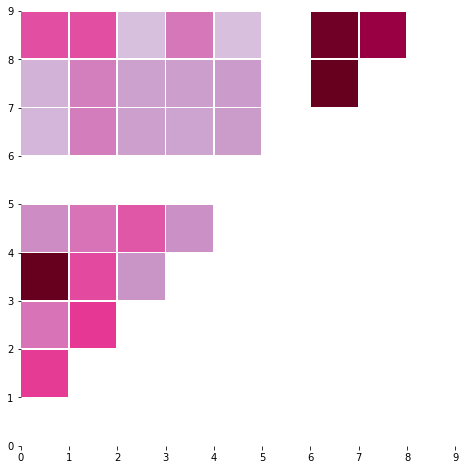

In [3]:
for dataset_name in ["norm_tweet"]: 
#for dataset_name in datasets: 
    for key, feature_set in features.items(): 
        dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv")
        dataset = dataset[feature_set]
        corr = dataset.corr()
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True,
                    square=True, linewidths=.5, cbar=True, cmap="PuRd", cbar_ax=1)#PuRd
        desc = "dataset: {} ({})".format(dataset_name, key)
        fig.text(0.5, 0.05, desc, ha='center')
        #fig.savefig("../img/corr_" + dataset_name + "_" + key + ".png", bbox_inches="tight")    
        

        
        

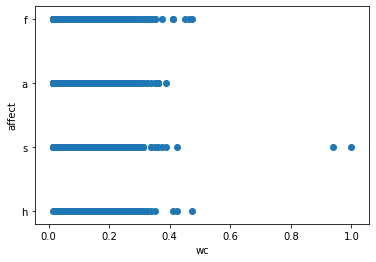

saving  ../img/scatter_norm_tweet_wc.png


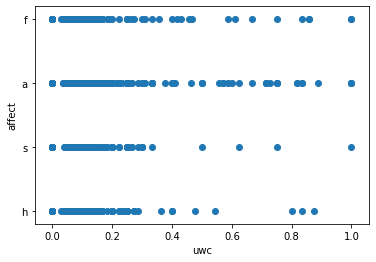

saving  ../img/scatter_norm_tweet_uwc.png


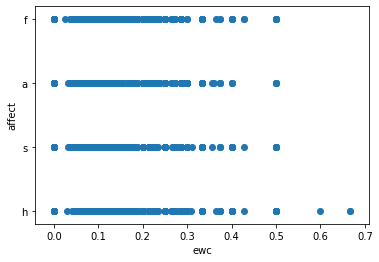

saving  ../img/scatter_norm_tweet_ewc.png


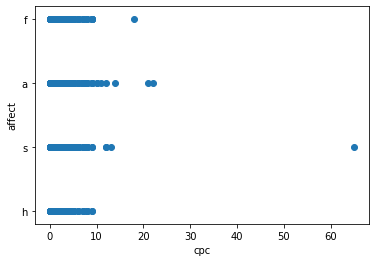

saving  ../img/scatter_norm_tweet_cpc.png


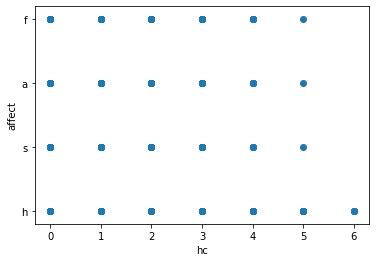

saving  ../img/scatter_norm_tweet_hc.png


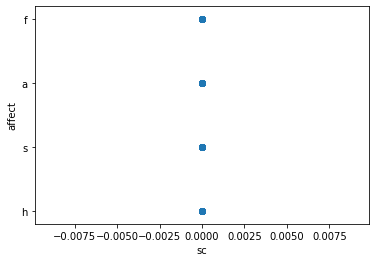

saving  ../img/scatter_norm_tweet_sc.png


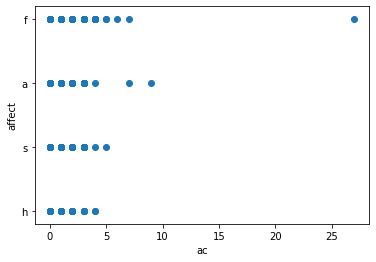

saving  ../img/scatter_norm_tweet_ac.png


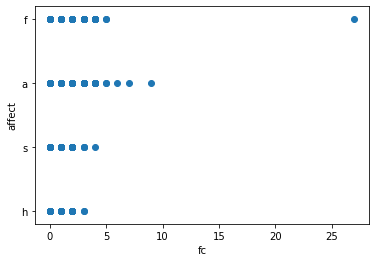

saving  ../img/scatter_norm_tweet_fc.png


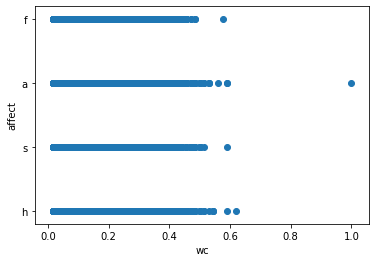

saving  ../img/scatter_norm_emotion_wc.png


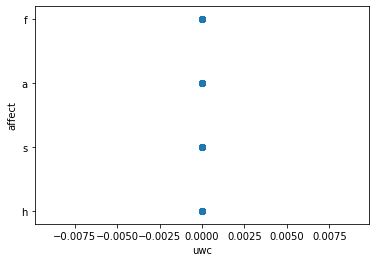

saving  ../img/scatter_norm_emotion_uwc.png


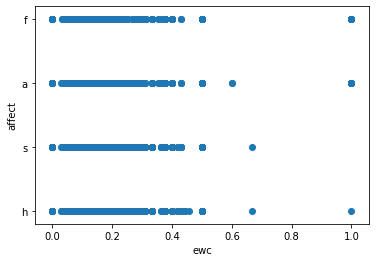

saving  ../img/scatter_norm_emotion_ewc.png


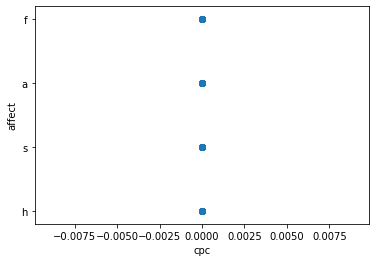

saving  ../img/scatter_norm_emotion_cpc.png


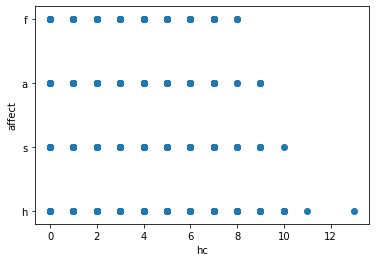

saving  ../img/scatter_norm_emotion_hc.png


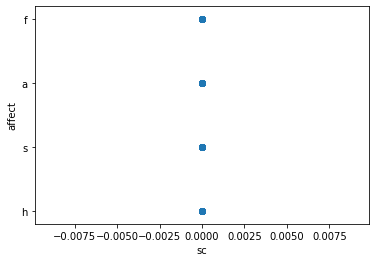

saving  ../img/scatter_norm_emotion_sc.png


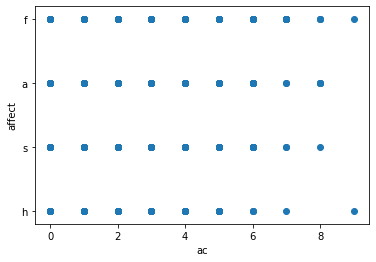

saving  ../img/scatter_norm_emotion_ac.png


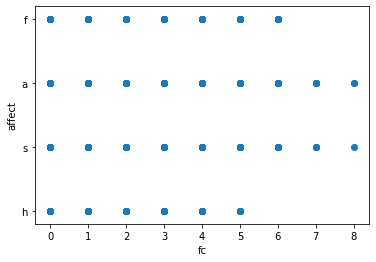

saving  ../img/scatter_norm_emotion_fc.png


In [121]:
# make simple scatterplots
  for dataset_name in ["norm_tweet", "norm_emotion"]: 
    for c in col: 
        dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv")
        fig = plt.figure()
        ax = plt.subplot()
        plt.clf()
        plt.ylabel("affect")
        plt.yticks([0, 1, 2, 3], labels=["h", "s", "a", "f"])
        plt.xlabel(c)
        ax = plt.scatter(dataset[c].tolist(), dataset["a"].tolist())
        plt.show()
        print("saving ", "../img/scatter_" + dataset_name + "_" + c + ".png")
        fig.savefig("../img/scatter_" + dataset_name + "_" + c + ".png", bbox_inches="tight")